# Simple Polynomial Regression
### Dataset:

https://icarus.cs.weber.edu/~hvalle/cs4580/data/FuelConsumptionCo2.csv

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [54]:
# Select some features to explore
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head()


,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6


array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>]], dtype=object)

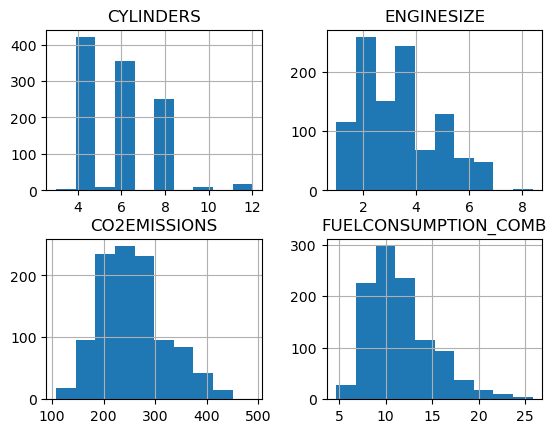

In [55]:
# Plot each feature
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()

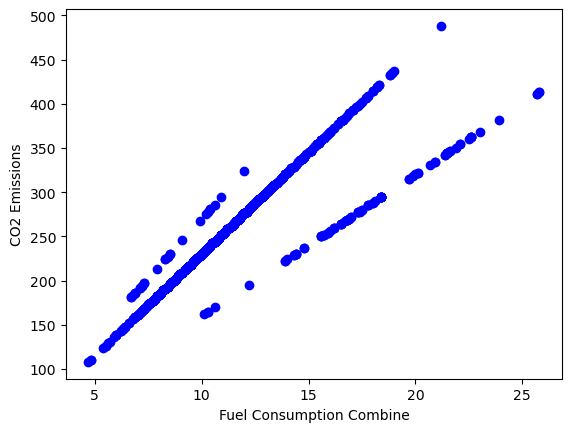

In [56]:
# Plot the features vs Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Combine')
plt.ylabel('CO2 Emissions')
plt.show()

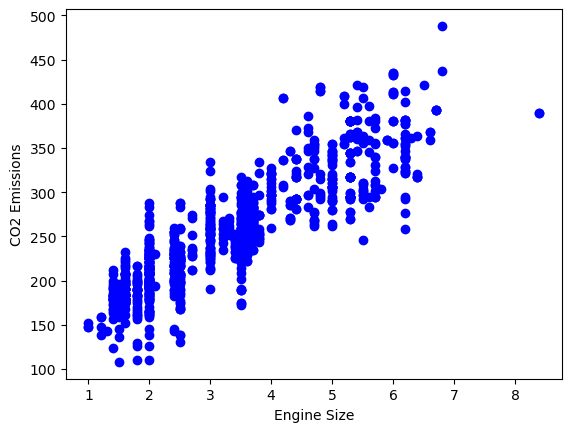

In [57]:
# Plot the features vs Engine Size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Create train and test dataset
Create two sets that are mutually exclusive. After which you will train your engine with the train set, and test with the test set.

In [58]:
# Split data
msk = np.random.rand(len(df)) < 0.8 # Select 80% of data
train = cdf[msk]    # 80%
test = cdf[~msk]    # 20%

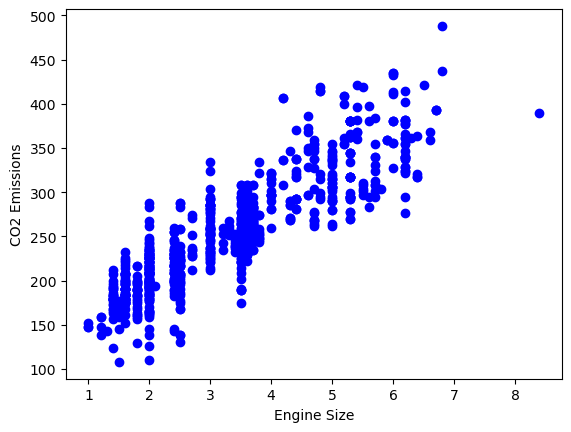

In [59]:
# Do a Linear Regression Model
# Plot the features vs Engine Size
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [60]:
# Model your Linear Regression on your train set
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']]) # This needs to be 2D
train_y = np.asarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)  # fit the model
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [[39.52142896]]
Intercept: [123.73035205]


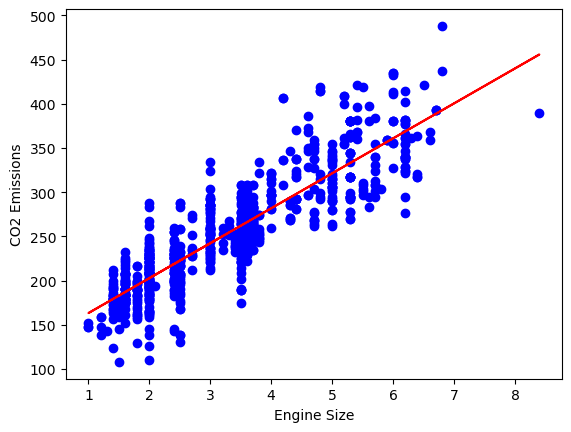

In [61]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
# coef is 2D, intercept is 1D
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.show()

In [62]:
# Do the evaluation
# Mean absolute Error, Residual Square Error, R-Square
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

# I think its normal to be different from the lecture, since my test set is chosen differently (Its random)
print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_hat - test_y))}')  # In the lecture it was 23.8976...
print(f'MSE: {np.mean((test_y_hat - test_y)**2)}')    # The MSE in the lecture was 0.1573.... The outer brackets where not there, but i think this is correct
print(f'R2-Score: {r2_score(test_y, test_y_hat)}')

Mean Absolute Error: 24.12461096743263
MSE: 1026.9479848410708
R2-Score: 0.7301323827983982


### TASK: Repeat the process using FUELCONSUMPTION_COMB and CO2EMISSIONS

In [63]:
# Model your Linear Regression on your train set
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['FUELCONSUMPTION_COMB']]) # This needs to be 2D
train_y = np.asarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)  # fit the model
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [[16.50377519]]
Intercept: [64.82808268]


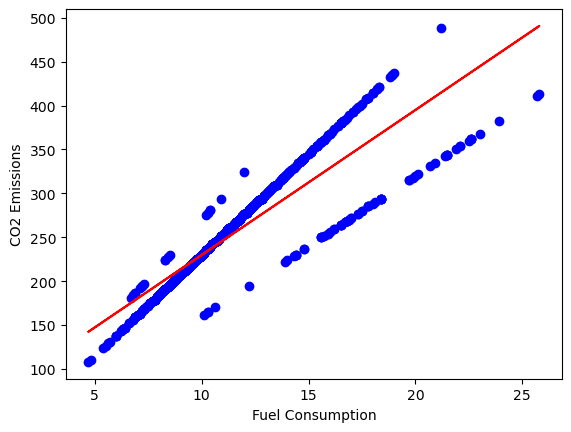

In [64]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
# coef is 2D, intercept is 1D
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.show()

In [65]:
# Do the evaluation
# Mean absolute Error, Residual Square Error, R-Square
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_hat - test_y))}')  
print(f'MSE: {np.mean((test_y_hat - test_y)**2)}')   
print(f'R2-Score: {r2_score(test_y, test_y_hat)}')

Mean Absolute Error: 20.55440985215729
MSE: 846.5948754179518
R2-Score: 0.7775266662610112


## Multiple Regression Model

In [66]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

print(f'Coefficients: {regr.coef_}')

Coefficients: [[11.03047586  7.56253091  9.63888985]]


In [67]:
# Get your prediction
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(test[['CO2EMISSIONS']])

print(f'MSE: {np.mean((y_hat - y)**2)}') 
print(f'Variance Score: {regr.score(x, y)}')
#print(f'Mean Absolute Error: {np.mean(np.absolute(y_hat - y))}')    
#print(f'R2-Score: {r2_score(y, y_hat)}')

MSE: 567.4692388702503
Variance Score: 0.8508769931976438


c:\Users\carst\anaconda3\envs\CS4580_Module6\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### TASK: Try Multiple Linear Regression using: FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of the FUELCONSUMPTION_COMB

Does it result in better accuracy?

In [68]:
train.columns

Index(['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB'], dtype='object')

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asarray(train[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

print(f'Coefficients: {regr.coef_}')

KeyError: "None of [Index(['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'], dtype='object')] are in the [columns]"

In [ ]:
# Get your prediction
y_hat = regr.predict(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x = np.asarray(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asarray(test[['CO2EMISSIONS']])

print(f'MSE: {np.mean((y_hat - y)**2)}') 
print(f'Variance Score: {regr.score(x, y)}')

KeyError: "None of [Index(['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'], dtype='object')] are in the [columns]"

## Polynomial Regression

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('../data/FuelConsumptionCo2.csv')

# Split data
msk = np.random.rand(len(df)) < 0.8 # Select 80% of data
train = cdf[msk]    # 80%
test = cdf[~msk]    # 20%

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [72]:
# Create your linear model
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
# Coefficients
print(f'Coefficients; {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

Coefficients; [[ 0.         49.46689252 -1.3821967 ]]
Intercept: [109.06490035]


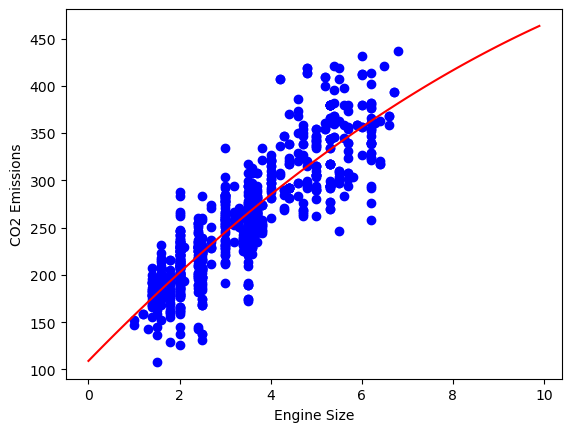

In [73]:
# plot it
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
YY = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2]*np.power(XX, 2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
# coef is 2D, intercept is 1D
plt.plot(XX, YY, '-r')
plt.show()


In [ ]:
# Evaluation will be done in the next lecture + decision trees